# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [62]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [63]:
# {
#   "coord": {
#     "lon": -122.08,
#     "lat": 37.39
#   },
#   "weather": [
#     {
#       "id": 800,
#       "main": "Clear",
#       "description": "clear sky",
#       "icon": "01d"
#     }
#   ],
#   "base": "stations",
#   "main": {
#     "temp": 282.55,
#     "feels_like": 281.86,
#     "temp_min": 280.37,
#     "temp_max": 284.26,
#     "pressure": 1023,
#     "humidity": 100
#   },
#   "visibility": 16093,
#   "wind": {
#     "speed": 1.5,
#     "deg": 350
#   },
#   "clouds": {
#     "all": 1
#   },
#   "dt": 1560350645,
#   "sys": {
#     "type": 1,
#     "id": 5122,
#     "message": 0.0139,
#     "country": "US",
#     "sunrise": 1560343627,
#     "sunset": 1560396563
#   },
#   "timezone": -25200,
#   "id": 420006353,
#   "name": "Mountain View",
#   "cod": 200
#   }               

In [64]:
city_data = []
# i=1
for city in cities:
    try:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
        response = requests.get(url).json()
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        hum = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind_sp = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]
        city_data.append({
            "City" : city,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": max_temp,
            "Humidity": hum,
            "Cloudiness": cloud,
            "Wind Speed": wind_sp,
            "Country": country,
            "Date": date
        })
        city_id = response["id"]
        print(f"Processed {city} with ID {city_id}")
#         i += 1
#         if i == 25:
#             break
    except:
        print(f"{city} not found")
#         i += 1
#         if i == 25:
#             break

Processed voloshka with ID 472387
amderma not found
Processed rikitea with ID 4030556
Processed popondetta with ID 2088163
Processed laguna with ID 5364271
nizhneyansk not found
Processed stutterheim with ID 951650
Processed avarua with ID 4035715
Processed panna with ID 1260454
Processed zaranj with ID 1120985
Processed mataura with ID 6201424
Processed cockburn town with ID 3576994
Processed graham with ID 5795906
Processed norilsk with ID 1497337
Processed roswell with ID 4219934
Processed wahiawa with ID 5853992
Processed salalah with ID 286621
Processed souillac with ID 933995
Processed port alfred with ID 964432
Processed kahului with ID 5847411
attawapiskat not found
Processed busselton with ID 2075265
Processed ulaangom with ID 1515029
Processed albany with ID 5106841
Processed nhulunbuy with ID 2064735
Processed ushuaia with ID 3833367
Processed kachiry with ID 1523662
Processed faya with ID 110690
Processed punta arenas with ID 3874787
Processed big spring with ID 5517061
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [118]:
city_data_df = pd.DataFrame(city_data)
city_data_df
city_data_df.to_csv(output_data_file)

In [104]:
stats_df = city_data_df[["Lat", "Lng", "Max Temp", "Humidity", 'Cloudiness', 'Wind Speed']]
count = stats_df.count()
mean = stats_df.mean()
std = stats_df.std()
minimum = stats_df.min()
lowerq = stats_df.quantile(q = 0.25)
middleq = stats_df.quantile(q = 0.5)
upperq = stats_df.quantile(q = 0.75)
maximum = stats_df.max()
summary_df = pd.DataFrame({
    "count": count,
    "mean": mean,
    "std": std,
    "min": minimum,
    "25%": lowerq,
    "50%": middleq,
    "75%": upperq,
    "max": maximum
})
#used https://stackoverflow.com/questions/17076705/invert-index-and-columns-in-a-pandas-dataframe
summary_df = summary_df.T
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,21.522454,10.698346,56.538813,69.831169,53.380334,8.408683
std,33.239357,90.136242,27.420368,22.069746,38.711233,5.888083
min,-54.800000,-179.166700,-32.570000,3.000000,0.000000,0.760000
25%,-8.046350,-69.618400,41.000000,57.000000,15.500000,3.925000
50%,28.166700,17.459700,63.000000,73.000000,59.000000,6.910000
75%,48.934900,86.090100,78.800000,87.000000,90.000000,11.500000
max,78.218600,178.416700,102.290000,100.000000,100.000000,29.930000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [105]:
clean_data = stats_df[stats_df["Humidity"] <= 100]
clean_data.count()
#same count = no cities over 100

Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

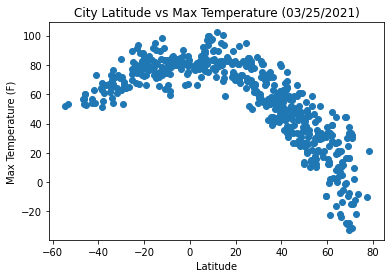

Plot to show the relationship between latitude and max temperature of different cities.


In [106]:
max_temp = city_data_df["Max Temp"]
lat = city_data_df["Lat"]
plt.scatter(lat, max_temp)
plt.title('City Latitude vs Max Temperature (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.show()
print("Plot to show the relationship between latitude and max temperature of different cities.")

## Latitude vs. Humidity Plot

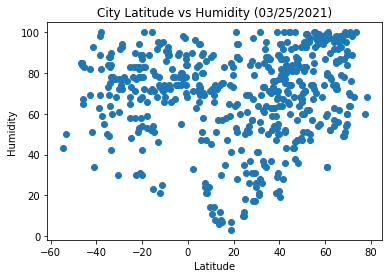

Plot to show the relationship between latitude and humidity of different cities.


In [107]:
hum = city_data_df["Humidity"]
lat = city_data_df["Lat"]
plt.scatter(lat, hum)
plt.title('City Latitude vs Humidity (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()
print("Plot to show the relationship between latitude and humidity of different cities.")

## Latitude vs. Cloudiness Plot

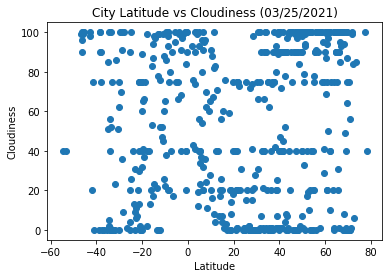

Plot to show the relationship between latitude and cloudiness of different cities.


In [108]:
max_temp = city_data_df["Max Temp"]
cloud = city_data_df["Cloudiness"]
plt.scatter(lat, cloud)
plt.title('City Latitude vs Cloudiness (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()
print("Plot to show the relationship between latitude and cloudiness of different cities.")

## Latitude vs. Wind Speed Plot

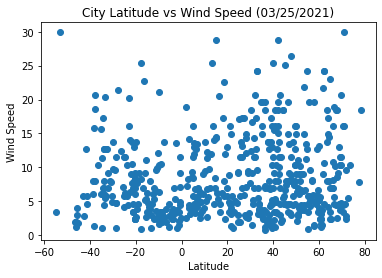

Plot to show the relationship between latitude and wind speed of different cities.


In [109]:
wind_sp = city_data_df["Wind Speed"]
lat = city_data_df["Lat"]
plt.scatter(lat, wind_sp)
plt.title('City Latitude vs Wind Speed (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()
print("Plot to show the relationship between latitude and wind speed of different cities.")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between the northern hemisphere's latitude and max temperature is -0.87


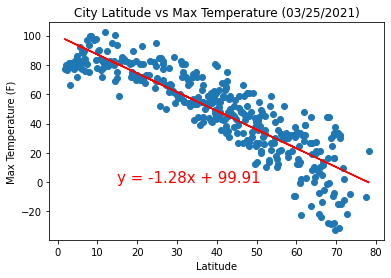

In [110]:
northern_lat = city_data_df[city_data_df["Lat"] >= 0]
nlat = northern_lat["Lat"]
max_temp = northern_lat["Max Temp"]
plt.scatter(nlat, max_temp)
plt.title('City Latitude vs Max Temperature (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Calculate the correlation coefficient and linear regression model 
# for northern hemisphere and max temp
correlation = st.pearsonr(nlat, max_temp)
print(f"The correlation between the northern hemisphere's latitude and max temperature is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, max_temp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(nlat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between the southern hemisphere's latitude and max temperature is 0.67


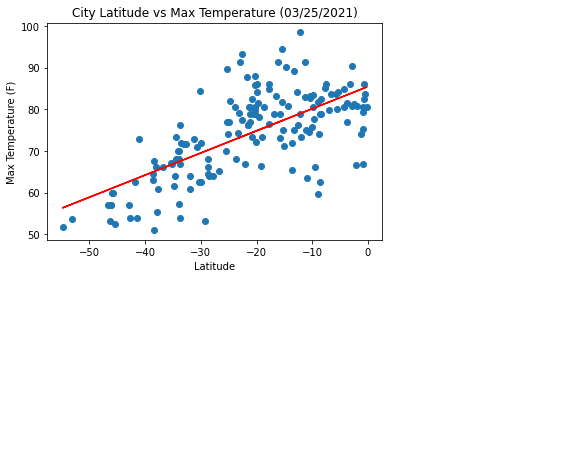

In [111]:
southern_lat = city_data_df[city_data_df["Lat"] < 0]
slat = southern_lat["Lat"]
max_temp = southern_lat["Max Temp"]
plt.scatter(slat, max_temp)
plt.title('City Latitude vs Max Temperature (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Calculate the correlation coefficient and linear regression model 
# for southern hemisphere and max temp
correlation = st.pearsonr(slat, max_temp)
print(f"The correlation between the southern hemisphere's latitude and max temperature is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat, max_temp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(slat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between the northern hemisphere's latitude and humidity is 0.34


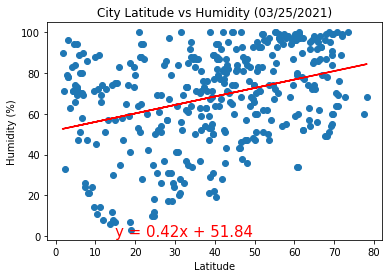

In [112]:
hum = northern_lat["Humidity"]
plt.scatter(nlat, hum)
plt.title('City Latitude vs Humidity (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Calculate the correlation coefficient and linear regression model 
# for northern hemisphere and humidity
correlation = st.pearsonr(nlat, hum)
print(f"The correlation between the northern hemisphere's latitude and humidity is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, hum)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(nlat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between the southern hemisphere's latitude and humidity is 0.12


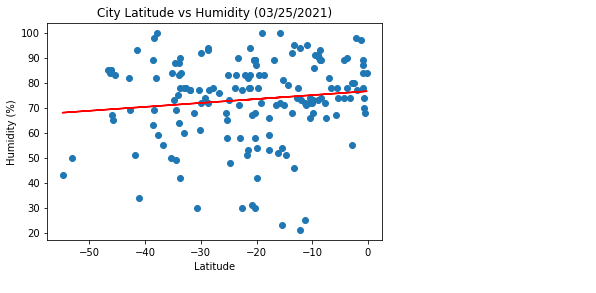

In [113]:
hum = southern_lat["Humidity"]
plt.scatter(slat, hum)
plt.title('City Latitude vs Humidity (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Calculate the correlation coefficient and linear regression model 
# for southern hemisphere and humidity
correlation = st.pearsonr(slat, hum)
print(f"The correlation between the southern hemisphere's latitude and humidity is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat, hum)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(slat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between the northern hemisphere's latitude and cloudiness is 0.19


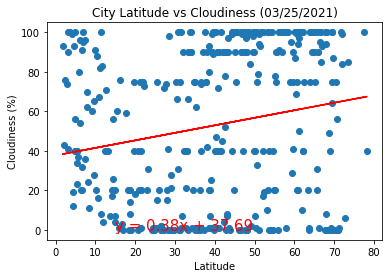

In [114]:
cloud = northern_lat["Cloudiness"]
plt.scatter(nlat, cloud)
plt.title('City Latitude vs Cloudiness (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Calculate the correlation coefficient and linear regression model 
# for northern hemisphere and cloudiness
correlation = st.pearsonr(nlat, cloud)
print(f"The correlation between the northern hemisphere's latitude and cloudiness is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, cloud)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(nlat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between the southern hemisphere's latitude and cloudiness is 0.14


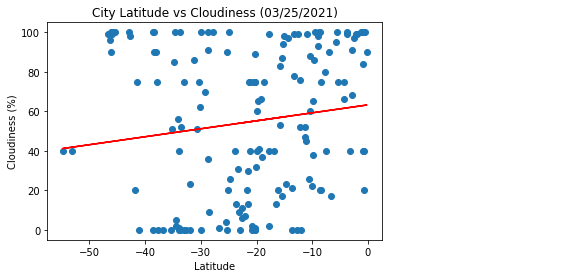

In [115]:
cloud = southern_lat["Cloudiness"]
plt.scatter(slat, cloud)
plt.title('City Latitude vs Cloudiness (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Calculate the correlation coefficient and linear regression model 
# for southern hemisphere and cloudiness
correlation = st.pearsonr(slat, cloud)
print(f"The correlation between the southern hemisphere's latitude and cloudiness is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat, cloud)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(slat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between the northern hemisphere's latitude and wind speed is 0.04


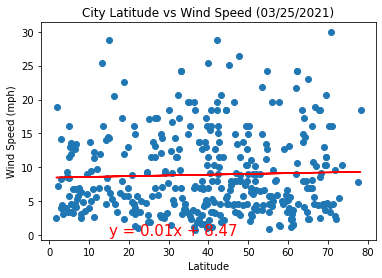

In [116]:
wind_sp = northern_lat["Wind Speed"]
plt.scatter(nlat,wind_sp)
plt.title('City Latitude vs Wind Speed (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Calculate the correlation coefficient and linear regression model 
# for northern hemisphere and wind speed
correlation = st.pearsonr(nlat, wind_sp)
print(f"The correlation between the northern hemisphere's latitude and wind speed is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(nlat, wind_sp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(nlat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between the southern hemisphere's latitude and wind speed is -0.23


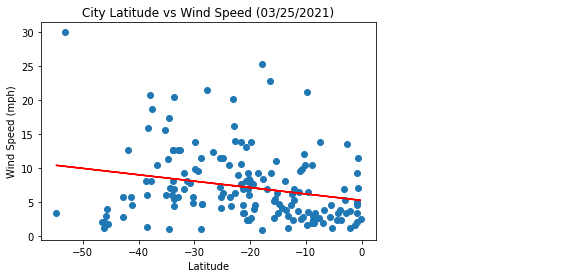

In [117]:
wind_sp = southern_lat["Wind Speed"]
plt.scatter(slat, wind_sp)
plt.title('City Latitude vs Wind Speed (03/25/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Calculate the correlation coefficient and linear regression model 
# for southern hemisphere and wind speed
correlation = st.pearsonr(slat, wind_sp)
print(f"The correlation between the southern hemisphere's latitude and wind speed is {round(correlation[0],2)}")

#get linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(slat, wind_sp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#add model to plot
plt.plot(slat, regress_values, "r-")
plt.annotate(line_eq, (15, 0), fontsize=15, color="red")
plt.show()